In [4]:
import praw
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
# Import personal use script, secret key, and user agent from separate .py file

from reddit_auth import reddit

In [6]:
# Get 15 popular subreddits from Reddit and display name
num_subreddits = 15
popular_subreddits = []
subreddits = reddit.subreddits.popular(limit=num_subreddits)

for subreddit in subreddits:
    subreddit_name = subreddit.display_name
    popular_subreddits.append(subreddit_name)
    print(subreddit_name)

Home
AskReddit
BaldursGate3
mildlyinfuriating
NoStupidQuestions
gaming
facepalm
pics
leagueoflegends
AmItheAsshole
AITAH
funny
Piracy
worldnews
wow


In [7]:
# Fetch 20 posts from each subreddit

subreddit_texts = {}
for subreddit_name in popular_subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    recent_posts = subreddit.new(limit=20)  
    post_texts = []
    
# Extract each post's title and comments

    for post in recent_posts:
        post_texts.append(post.title) 
        post.comments.replace_more(limit=None)
        for comment in post.comments.list():
            post_texts.append(comment.body) 

    subreddit_texts[subreddit_name] = ' '.join(post_texts) 

In [14]:
# Initialize dictionary which will contain subreddits as keys and common words as values

common_words_dict = {}
for subreddit_name, text in subreddit_texts.items():
    words = text.lower().split()
    word_counts = Counter(words)
    common_words_dict[subreddit_name] = [word for word, count in word_counts.items() if len(word) >= 5 and count > 1]

In [15]:
# Find and print common words across subreddits

common_words_across_subreddits = Counter()
for words_list in common_words_dict.values():
    common_words_across_subreddits.update(words_list)

print("\nCommon words found across multiple subreddits:")
for word, count in common_words_across_subreddits.items():
    if count > 1: 
        print(f"{word}: Found in {count} subreddits")


Common words found across multiple subreddits:
going: Found in 13 subreddits
through: Found in 7 subreddits
remove: Found in 3 subreddits
really: Found in 13 subreddits
cannot: Found in 4 subreddits
post.: Found in 2 subreddits
should: Found in 13 subreddits
shouldn't: Found in 4 subreddits
anything: Found in 11 subreddits
that's: Found in 12 subreddits
looks: Found in 5 subreddits
there: Found in 14 subreddits
provide: Found in 2 subreddits
place: Found in 6 subreddits
can't: Found in 11 subreddits
trust: Found in 4 subreddits
getting: Found in 11 subreddits
here.: Found in 7 subreddits
you'd: Found in 4 subreddits
before: Found in 9 subreddits
supported: Found in 2 subreddits
right: Found in 10 subreddits
holding: Found in 4 subreddits
anything.: Found in 2 subreddits
never: Found in 13 subreddits
support: Found in 5 subreddits
always: Found in 11 subreddits
steel: Found in 2 subreddits
think: Found in 14 subreddits
around: Found in 7 subreddits
moment: Found in 4 subreddits
moving:

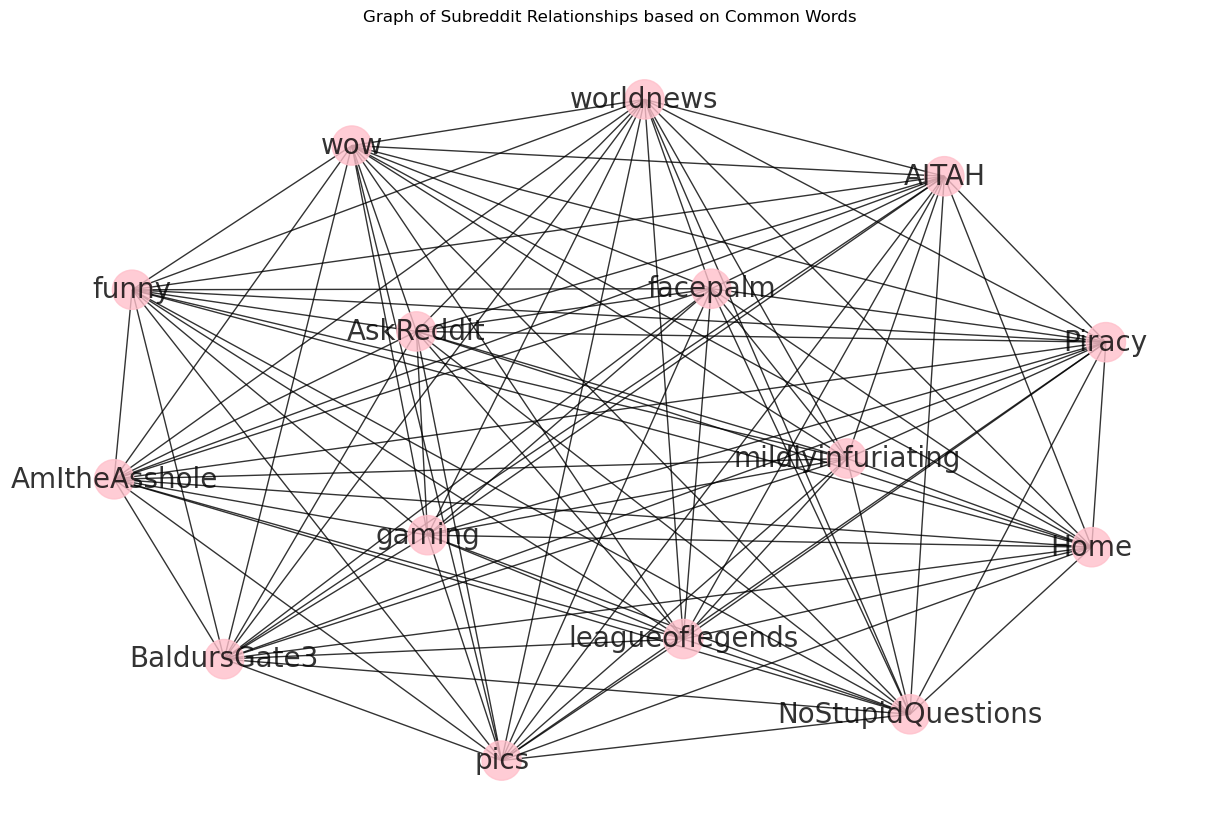

In [16]:
# Create a graph displaying nodes and edges

G = nx.Graph()

# Add nodes to the graph

for subreddit in popular_subreddits:
    G.add_node(subreddit)

# Compare popular subreddits based on common word counts and add edges to the graph

for i in range(len(popular_subreddits)):
    for j in range(i + 1, len(popular_subreddits)):
        subreddit1 = popular_subreddits[i]
        subreddit2 = popular_subreddits[j]
        words1 = set([word[0] for word in common_words_dict[subreddit1]])
        words2 = set([word[0] for word in common_words_dict[subreddit2]])
        common_count = len(words1.intersection(words2))

        if common_count > 5:
            G.add_edge(subreddit1, subreddit2)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=800, font_size=20, alpha=0.8, node_color=['pink' for node in G.nodes])
plt.title("Graph of Subreddit Relationships based on Common Words")
plt.show()

In [17]:
# Find three most important nodes

node_degrees = dict(G.degree())

sorted_nodes = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)

print("\nTop three nodes with the most edges:")
for node, degree in sorted_nodes[:3]:
    print(f"Node: {node}, Degree: {degree}")


Top three nodes with the most edges:
Node: Home, Degree: 14
Node: AskReddit, Degree: 14
Node: BaldursGate3, Degree: 14
